In [84]:
import json
import numpy as np
import pandas as pd
import requests

In [85]:
def get_json(api_url):
	response = requests.get(api_url)
	if response.status_code == 200:
		return json.loads(response.content.decode('utf-8'))
	else:
		return None
		

In [86]:
#Reformat Data Frame
pd.set_option("display.max_columns", None)

covid_url = "D:\\downloads\\DATASET-DATASCIENCE-20211015T124508Z-001\\Analisis Data COVID19 di Dunia & ASEAN\\covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)

print("Informasi data frame awal:")
df_covid_worldwide.info()

df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index()

print("\nInformasi data frame setelah set index kolom date:")
df_covid_worldwide.info()

Informasi data frame awal:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61900 entries, 0 to 61899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   61900 non-null  datetime64[ns]
 1   daily_confirmed_cases  61900 non-null  int64         
 2   daily_deaths           61900 non-null  int64         
 3   confirmed_cases        61900 non-null  int64         
 4   deaths                 61900 non-null  int64         
 5   geo_id                 61625 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.3+ MB

Informasi data frame setelah set index kolom date:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61900 entries, 2019-12-31 to 2020-12-14
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   daily_confirmed_cases  61900 non-null  i

In [87]:
#Missing Value di DataFrame
print("Jumlah missing value tiap kolom:")
print(df_covid_worldwide.isna().sum())

df_covid_worldwide.dropna(inplace=True)

print("\nJumlah missing value tiap kolom setelah didrop:")
print(df_covid_worldwide.isna().sum())

Jumlah missing value tiap kolom:
daily_confirmed_cases      0
daily_deaths               0
confirmed_cases            0
deaths                     0
geo_id                   275
dtype: int64

Jumlah missing value tiap kolom setelah didrop:
daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
geo_id                   0
dtype: int64


In [88]:
#membaca data countries
countries_url = "D:\\downloads\\DATASET-DATASCIENCE-20211015T124508Z-001\\Analisis Data COVID19 di Dunia & ASEAN\\country_details.json"
df_countries = pd.read_json(countries_url)
print(df_countries.head())

  geo_id country_name
0     TD         Chad
1     CU         Cuba
2     FJ         Fiji
3     GU         Guam
4     IR         Iran


In [89]:
#Merge Covid19 Data dan Countries
df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")
print(df_covid_denormalized.head())

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2020-01-01                      0             0                0       0   
2020-01-02                      0             0                0       0   
2020-01-03                      0             0                0       0   
2020-01-04                      0             0                0       0   

           geo_id country_name  
date                            
2019-12-31     IN        India  
2020-01-01     IN        India  
2020-01-02     IN        India  
2020-01-03     IN        India  
2020-01-04     IN        India  


In [90]:
#menghitung fatility ratio
df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"]/df_covid_denormalized["confirmed_cases"]
print(df_covid_denormalized.head())

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2020-01-01                      0             0                0       0   
2020-01-02                      0             0                0       0   
2020-01-03                      0             0                0       0   
2020-01-04                      0             0                0       0   

           geo_id country_name  fatality_ratio  
date                                            
2019-12-31     IN        India             NaN  
2020-01-01     IN        India             NaN  
2020-01-02     IN        India             NaN  
2020-01-03     IN        India             NaN  
2020-01-04     IN        India             NaN  


In [91]:
#Negara-negara dengan Fatality Ratio Tertinggi
df_top_20_fatality_rate = df_covid_denormalized.sort_values("fatality_ratio", ascending=False).head(20)
print(df_top_20_fatality_rate[["geo_id","country_name","fatality_ratio"]])

           geo_id country_name  fatality_ratio
date                                          
2020-03-15     SD        Sudan             1.0
2020-02-20     IR         Iran             1.0
2020-03-16     GT    Guatemala             1.0
2020-03-13     GY       Guyana             1.0
2020-03-18     SD        Sudan             1.0
2020-03-17     SD        Sudan             1.0
2020-03-16     SD        Sudan             1.0
2020-02-03     PH  Philippines             0.5
2020-02-05     PH  Philippines             0.5
2020-02-04     PH  Philippines             0.5
2020-03-28     NI    Nicaragua             0.5
2020-02-02     PH  Philippines             0.5
2020-03-24     ZW     Zimbabwe             0.5
2020-03-24     GM       Gambia             0.5
2020-03-19     SD        Sudan             0.5
2020-03-20     SD        Sudan             0.5
2020-03-21     SD        Sudan             0.5
2020-03-22     SD        Sudan             0.5
2020-03-23     SD        Sudan             0.5
2020-03-24   

In [92]:
#Kondisi Fatality ratio Tertinggi di Bulan Agustus 2020
df_covid_denormalized_august = df_covid_denormalized.loc["2020-08"].groupby("country_name").sum()

df_covid_denormalized_august["fatality_ratio"] = df_covid_denormalized_august["deaths"]/df_covid_denormalized_august["confirmed_cases"]

df_top_20_fatality_rate_on_august = df_covid_denormalized_august.sort_values(by="fatality_ratio", ascending=False).head(20)

print(df_top_20_fatality_rate_on_august["fatality_ratio"])

country_name
Yemen                     0.286473
Italy                     0.138619
France                    0.137979
United_Kingdom            0.130228
Belgium                   0.125079
Hungary                   0.122820
Netherlands               0.099309
Mexico                    0.099092
Jersey                    0.088677
Spain                     0.079746
Chad                      0.078870
Montserrat                0.076923
Canada                    0.073963
Sweden                    0.071475
Isle_of_Man               0.071429
British_Virgin_Islands    0.066239
Ireland                   0.065030
Sudan                     0.064250
Liberia                   0.063944
Ecuador                   0.061031
Name: fatality_ratio, dtype: float64


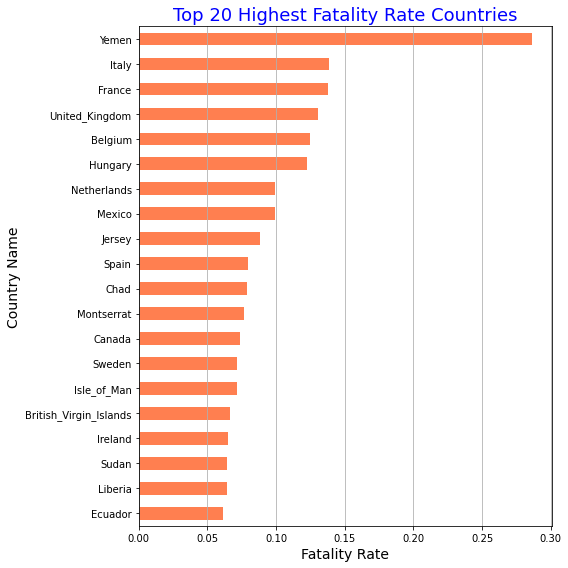

In [93]:
#Visualisasi Negara dengan Fatality Ratio Tertinggi di Bulan Agustus 2020
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
df_top_20_fatality_rate_on_august["fatality_ratio"].sort_values().plot(kind="barh", color="coral")
plt.title("Top 20 Highest Fatality Rate Countries", fontsize=18, color="b")
plt.xlabel("Fatality Rate", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.grid(axis="x")
plt.tight_layout()
plt.show()

In [94]:
#Data Frame Kasus COVID-19 ASEAN
asean_country_id = ["ID", "MY", "SG", "TH", "VN"]
filter_list = [(df_covid_denormalized["geo_id"]==country_id).to_numpy() for country_id in asean_country_id]
filter_array = np.column_stack(filter_list).sum(axis=1, dtype="bool")
df_covid_denormalized_asean = df_covid_denormalized[filter_array].sort_index()

print("Cek nilai unik di kolom 'country_name':", df_covid_denormalized_asean["country_name"].unique())
print(df_covid_denormalized_asean.head())

Cek nilai unik di kolom 'country_name': ['Malaysia' 'Vietnam' 'Thailand' 'Singapore' 'Indonesia']
            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   

           geo_id country_name  fatality_ratio  
date                                            
2019-12-31     MY     Malaysia             NaN  
2019-12-31     VN      Vietnam             NaN  
2019-12-31     TH     Thailand             NaN  
2019-12-31     SG    Singapore             NaN  
2019-12-31     ID    Indonesia             NaN  


In [95]:
#Kasus Pertama COVID-19 di ASEAN
print("The first case popped up in each of 5 ASEAN countries:")
for country_id in asean_country_id:
    asean_country = df_covid_denormalized_asean[df_covid_denormalized_asean["geo_id"]==country_id]
    first_case = asean_country[asean_country["confirmed_cases"]>0][["confirmed_cases","geo_id","country_name"]]
    print(first_case.head(1))

The first case popped up in each of 5 ASEAN countries:
            confirmed_cases geo_id country_name
date                                           
2020-03-02                2     ID    Indonesia
            confirmed_cases geo_id country_name
date                                           
2020-01-25                3     MY     Malaysia
            confirmed_cases geo_id country_name
date                                           
2020-01-24                3     SG    Singapore
            confirmed_cases geo_id country_name
date                                           
2020-01-13                1     TH     Thailand
            confirmed_cases geo_id country_name
date                                           
2020-01-24                2     VN      Vietnam


In [96]:
df_covid_denormalized_asean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1731 entries, 2019-12-31 to 2020-12-14
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   daily_confirmed_cases  1731 non-null   int64  
 1   daily_deaths           1731 non-null   int64  
 2   confirmed_cases        1731 non-null   int64  
 3   deaths                 1731 non-null   int64  
 4   geo_id                 1731 non-null   object 
 5   country_name           1731 non-null   object 
 6   fatality_ratio         1583 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 108.2+ KB


In [97]:
#Kasus Covid-19 di ASEAN mulai Bulan Maret 2020
df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean[df_covid_denormalized_asean.index>="2020-03-01"]
print(df_covid_denormalized_asean_march_onward.head())

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2020-03-01                      0             1               42       1   
2020-03-01                      4             0              102       0   
2020-03-01                      0             0               16       0   
2020-03-01                      0             0                0       0   
2020-03-01                      0             0               25       0   

           geo_id country_name  fatality_ratio  
date                                            
2020-03-01     TH     Thailand         0.02381  
2020-03-01     SG    Singapore         0.00000  
2020-03-01     VN      Vietnam         0.00000  
2020-03-01     ID    Indonesia             NaN  
2020-03-01     MY     Malaysia         0.00000  


In [98]:
df_covid_denormalized_asean_march_onward.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio
date,,,,,,,
2020-03-01,0,1,42,1,TH,Thailand,0.02381
2020-03-01,4,0,102,0,SG,Singapore,0.00000
2020-03-01,0,0,16,0,VN,Vietnam,0.00000
2020-03-01,0,0,0,0,ID,Indonesia,NaN
2020-03-01,0,0,25,0,MY,Malaysia,0.00000


In [101]:
df_covid_denormalized_asean_march_onward['date'] = df_covid_denormalized_asean_march_onward.index.date

C:\Users\User\AppData\Local\Temp/ipykernel_4892/3735489887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_denormalized_asean_march_onward['date'] = df_covid_denormalized_asean_march_onward.index.date


In [110]:
df_covid_denormalized_asean_march_onward = df_covid_denormalized_asean_march_onward.reset_index(drop=True)
df_covid_denormalized_asean_march_onward.head()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,geo_id,country_name,fatality_ratio,date
0,0,1,42,1,TH,Thailand,0.02381,2020-03-01
1,4,0,102,0,SG,Singapore,0.00000,2020-03-01
2,0,0,16,0,VN,Vietnam,0.00000,2020-03-01
3,0,0,0,0,ID,Indonesia,NaN,2020-03-01
4,0,0,25,0,MY,Malaysia,0.00000,2020-03-01


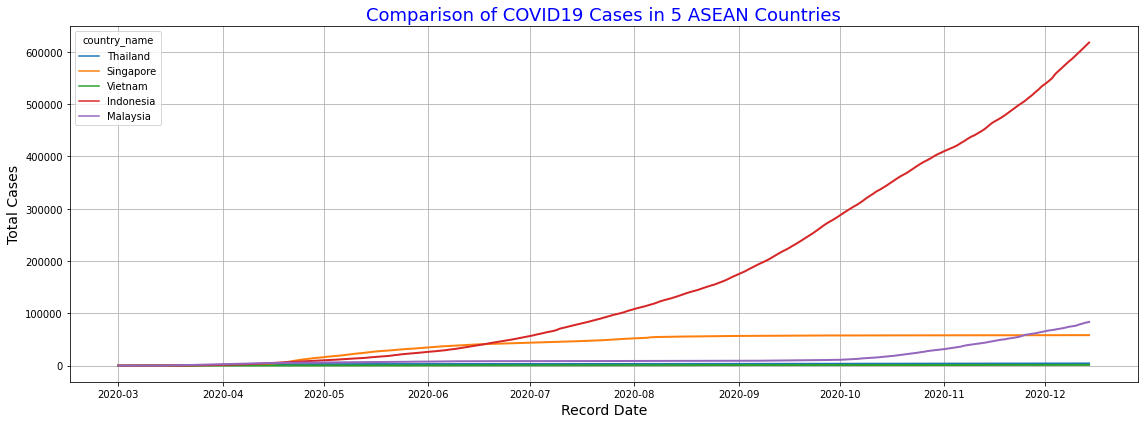

In [111]:
#Visualisasi Kasus COVID-19 di ASEAN
import seaborn as sns
plt.figure(figsize=(16,6))
sns.lineplot(data=df_covid_denormalized_asean_march_onward, 
             x=df_covid_denormalized_asean_march_onward['date'], 
             y="confirmed_cases", 
             hue="country_name",
             linewidth=2)
plt.xlabel('Record Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.title('Comparison of COVID19 Cases in 5 ASEAN Countries', color="b", fontsize=18)
plt.grid()
plt.tight_layout()
plt.show()